In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns S
import path
import preprocessing as pp
import confusion_matrix as cm

from sklearn.metrics import classification_report

In [2]:
np.random.seed(13)
tf.random.set_seed(13)

In [3]:
X_train, X_test, y_train, y_test, X_columns, y_columns = pp.load_data('no_measures', y_goal_diff=True)

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(list(X_columns.keys()))
print(list(y_columns.keys()))

(8995, 366, 12)
(2249, 366, 12)
(8995,)
(2249,)
['st_x', 'st_y', 'event_blocked_shot', 'event_faceoff', 'event_giveaway', 'event_hit', 'event_missed_shot', 'event_penalty', 'event_shot', 'event_takeaway', 'event_dummy', 'home_team_for']
['goal_diff']


In [4]:
print(np.mean(y_train))
print(np.mean(y_test))

0.28237909949972206
0.22987994664295242


In [6]:
model_mlp = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])
model_mlp.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [7]:
model_mlp.fit(X_train, y_train, epochs=10, validation_split=0.2)

Train on 7196 samples, validate on 1799 samples
Epoch 1/10
7196/7196 [==============================] - 3s 451us/sample - loss: 5.5301 - mae: 1.8777 - val_loss: 5.3777 - val_mae: 1.8200
Epoch 2/10
7196/7196 [==============================] - 3s 390us/sample - loss: 5.0547 - mae: 1.7797 - val_loss: 4.9395 - val_mae: 1.7492
Epoch 3/10
7196/7196 [==============================] - 4s 494us/sample - loss: 4.5625 - mae: 1.6763 - val_loss: 4.6324 - val_mae: 1.6757
Epoch 4/10
7196/7196 [==============================] - 3s 473us/sample - loss: 4.2757 - mae: 1.6160 - val_loss: 4.5809 - val_mae: 1.6685
Epoch 5/10
7196/7196 [==============================] - 3s 406us/sample - loss: 4.1316 - mae: 1.5883 - val_loss: 4.5294 - val_mae: 1.6584
Epoch 6/10
7196/7196 [==============================] - 4s 500us/sample - loss: 4.0276 - mae: 1.5738 - val_loss: 4.5005 - val_mae: 1.6513
Epoch 7/10
7196/7196 [==============================] - 4s 510us/sample - loss: 3.8930 - mae: 1.5390 - val_loss: 4.4594 - va

In [8]:
results_mlp = model_mlp.evaluate(X_test, y_test, verbose=0)
y_pred_mlp = model_mlp.predict(X_test).flatten()

print("Test MSE for feedforward network:", results_mlp[0])
print("Test MAE for feedforward network:", results_mlp[1])

Test mean squared error for feedforward network: 4.383348115341777
Test mean absolute error for feedforward network: 1.629597


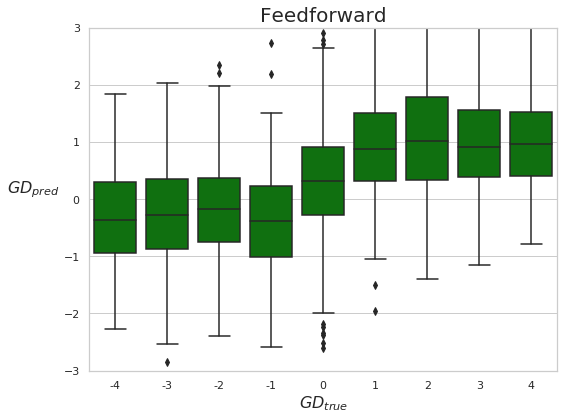

In [9]:
sns.set(style='whitegrid')

plt.subplots(figsize=(8,6))

sns.boxplot(y_test, y_pred_mlp, color='green')

plt.xlim(3.5, 12.5)
plt.ylim(-3, 3)

plt.xlabel('$GD_{true}$', fontsize=16)
plt.ylabel('$GD_{pred}$', fontsize=16, rotation=0, labelpad=30)
plt.title('Feedforward', fontsize=20)

plt.tight_layout()
plt.savefig("img/GDtrue_vs_GDpred_mlp.png")
plt.show()

In [10]:
# plt.style.use('default')
# plt.subplots(figsize=(8, 6))

# points = np.arange(-6, 6)

# plt.scatter(y_pred_mlp, y_test, c='green', s=3)
# plt.plot(points, points, linestyle='dashed', color='black')

# plt.xlabel('$GD_{pred}$', fontsize=16)
# plt.ylabel('$GD_{true}$', fontsize=16, rotation=0, labelpad=30)
# plt.title('Feedforward', fontsize=20)

# plt.xlim((-5.5, 5.5))
# plt.ylim((-5.5, 5.5))

# plt.tight_layout()
# plt.savefig("img/GDtrue_vs_GDpred_mlp.png")

# plt.show()

In [11]:
model_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(64, 12, activation='relu', input_shape=X_train.shape[1:]),
    tf.keras.layers.Conv1D(32, 8, activation='relu'),
    tf.keras.layers.AveragePooling1D(3),
    tf.keras.layers.Conv1D(16, 6, activation='relu'),
    tf.keras.layers.Conv1D(16, 6, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])
model_cnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [12]:
model_cnn.fit(X_train, y_train, epochs=10, validation_split=0.2)

Train on 7196 samples, validate on 1799 samples
Epoch 1/10
7196/7196 [==============================] - 11s 1ms/sample - loss: 5.4667 - mae: 1.8481 - val_loss: 5.4154 - val_mae: 1.8335
Epoch 2/10
7196/7196 [==============================] - 9s 1ms/sample - loss: 5.4384 - mae: 1.8484 - val_loss: 5.3856 - val_mae: 1.8517
Epoch 3/10
7196/7196 [==============================] - 10s 1ms/sample - loss: 5.4028 - mae: 1.8427 - val_loss: 5.3022 - val_mae: 1.8346
Epoch 4/10
7196/7196 [==============================] - 9s 1ms/sample - loss: 5.2555 - mae: 1.8072 - val_loss: 5.0111 - val_mae: 1.7493
Epoch 5/10
7196/7196 [==============================] - 10s 1ms/sample - loss: 4.9041 - mae: 1.7205 - val_loss: 4.5747 - val_mae: 1.6346
Epoch 6/10
7196/7196 [==============================] - 11s 2ms/sample - loss: 4.4834 - mae: 1.6176 - val_loss: 4.3503 - val_mae: 1.5656
Epoch 7/10
7196/7196 [==============================] - 11s 1ms/sample - loss: 4.1997 - mae: 1.5609 - val_loss: 4.1742 - val_mae: 1.

In [13]:
results_cnn = model_cnn.evaluate(X_test, y_test, verbose=0)
y_pred_cnn = model_cnn.predict(X_test).flatten()

print("Test mean squared error for convolutional network:", results_cnn[0])
print("Test mean absolute error for convolutional network:", results_cnn[1])

Test mean squared error for convolutional network: 4.100980104367539
Test mean absolute error for convolutional network: 1.5172487


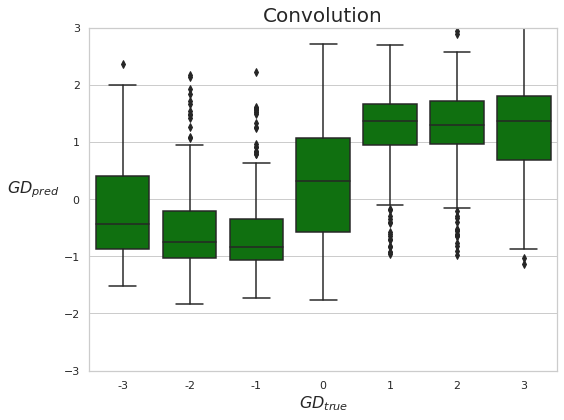

In [14]:
sns.set(style='whitegrid')

plt.subplots(figsize=(8,6))

sns.boxplot(y_test, y_pred_cnn, color='green')

plt.ylim(-3, 3)
plt.xlim(4.5, 11.5)

plt.xlabel('$GD_{true}$', fontsize=16)
plt.ylabel('$GD_{pred}$', fontsize=16, rotation=0, labelpad=30)
plt.title('Convolution', fontsize=20)

plt.tight_layout()
plt.savefig("img/GDtrue_vs_GDpred_cnn.png")
plt.show()

In [15]:
# y_pred_train_cnn = model_cnn.predict(X_train).flatten()

sns.set(style='whitegrid')

plt.subplots(figsize=(8,6))

sns.boxplot(y_train, y_pred_train_cnn, color='green')

plt.ylim(-3, 3)
plt.xlim(4.5, 11.5)

plt.xlabel('$GD_{true}$', fontsize=16)
plt.ylabel('$GD_{pred}$', fontsize=16, rotation=0, labelpad=30)
plt.title('Train', fontsize=20)

plt.tight_layout()
plt.savefig("img/GDtrue_vs_GDpred_overfit_train.png")
plt.show()

plt.subplots(figsize=(8, 6))

plt.scatter(y_pred_train_cnn, y_train, c='green', s=3)
plt.plot(points, points, linestyle='dashed', color='black')

plt.xlabel('$GD_{pred}$', fontsize=16, labelpad=10)
plt.ylabel('$GD_{true}$', fontsize=16, rotation=0, labelpad=30)
# plt.title('Convolution predictions on training data', fontsize=20)

plt.xlim((-5.5, 5.5))
plt.ylim((-5.5, 5.5))

plt.tight_layout()
plt.savefig("img/GDtrue_vs_GDpred_cnn_train.png")

plt.show()

In [16]:
# plt.style.use('default')
# plt.subplots(figsize=(8, 6))

# plt.scatter(y_pred_cnn, y_test, c='green', s=3)
# plt.plot(points, points, linestyle='dashed', color='black')

# plt.xlabel('$GD_{pred}$', fontsize=16, labelpad=10)
# plt.ylabel('$GD_{true}$', fontsize=16, rotation=0, labelpad=30)
# plt.title('Convolution', fontsize=20)

# plt.xlim((-5.5, 5.5))
# plt.ylim((-5.5, 5.5))

# plt.tight_layout()
# plt.savefig("img/GDtrue_vs_GDpred_cnn.png")

# plt.show()

In [17]:
game_stats = pd.read_csv("data/csv/game_teams_stats.csv")

index_test = np.load('data/no_measures/index/index_test.npy')
id_test = np.load('data/no_measures/id/id_test.npy')
id_train = np.load('data/no_measures/id/id_train.npy')

ids = np.concatenate((id_test, id_train))

home = game_stats.loc[game_stats['HoA']=='home']
away = game_stats.loc[game_stats['HoA']=='away']
game_stats = home.merge(away, on='game_id', suffixes=['_home', '_away'])

game_stats = game_stats.loc[game_stats['game_id'].isin(ids), :]
game_stats = game_stats.sort_values(by='game_id')

game_stats = game_stats.reset_index(drop=True)
game_stats = game_stats.iloc[index_test, :]

In [18]:
print(game_stats['game_id'].all() == np.sort(id_test).all())

True


In [19]:
def pdo(x):
    return 100*(x[0]/(x[2]+x[0]) + x[3]/(x[1]+x[3]))

In [20]:
game_stats['pdo_home'] = game_stats.loc[:, ['goals_home', 'goals_away', 
                                            'shots_home', 'shots_away']].apply(pdo, axis=1)

game_stats['pdo_away'] = game_stats.loc[:, ['goals_away', 'goals_home', 
                                            'shots_away', 'shots_home']].apply(pdo, axis=1)

In [21]:
# pred_diff_cnn = y_test-y_pred_cnn
corr_cnn = np.corrcoef(game_stats['pdo_home'].to_numpy(), y_pred_cnn)[0, 1]

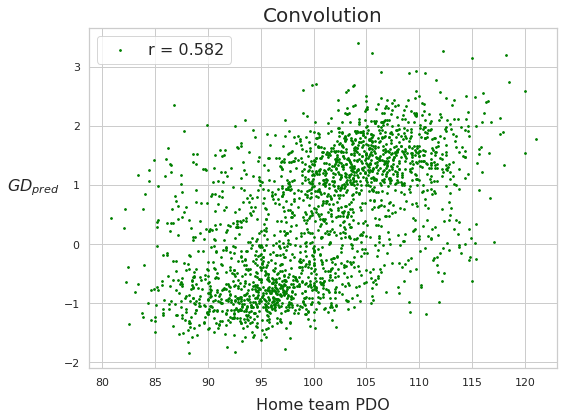

In [22]:
plt.subplots(figsize=(8, 6))

plt.scatter(game_stats['pdo_home'].to_numpy(), y_pred_cnn, c='green', s=3, label='r = {0}'.format(np.around(corr_cnn, 3)))

plt.legend(fontsize=16)

plt.ylabel('$GD_{pred}$', fontsize=16, rotation=0, labelpad=30)
plt.xlabel('Home team PDO', fontsize=16, labelpad=10)
plt.title('Convolution', fontsize=20)

plt.tight_layout()
plt.savefig('img/GDpred_vs_PDOhome_cnn.png')

plt.show()

In [23]:
corr_mlp = np.corrcoef(game_stats['pdo_home'].to_numpy(), y_pred_mlp)[0, 1]

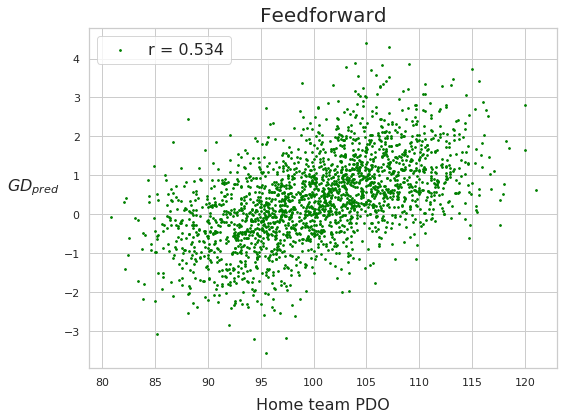

In [24]:
plt.subplots(figsize=(8, 6))

plt.scatter(game_stats['pdo_home'].to_numpy(), y_pred_mlp, c='green', s=3, label='r = {0}'.format(np.around(corr_mlp, 3)))

plt.legend(loc=2, fontsize=16)

plt.ylabel('$GD_{pred}$', fontsize=16, rotation=0, labelpad=30)
plt.xlabel('Home team PDO', fontsize=16, labelpad=10)
plt.title('Feedforward', fontsize=20)

plt.tight_layout()
plt.savefig('img/GDpred_vs_PDOhome_mlp.png')

plt.show()

In [25]:
def result(goal_diff):
    if np.abs(goal_diff) <= 0.5:
        return 1
    elif goal_diff > 0:  
        return 0
    else:
        return 2    

In [26]:
y_pred_result_cnn = np.zeros(len(y_pred_cnn))
for i in range(len(y_pred_cnn)):
    y_pred_result_cnn[i] = result(y_pred_cnn[i])

In [27]:
y_test_result = np.load('data/no_measures/numpy/y_test_result.npy')

In [28]:
print("Accuracy: ", np.sum(y_pred_result_cnn == y_test_result.argmax(axis=1)) / len(y_test_result))

Accuracy:  0.6073810582481103


In [29]:
classes = ['home win', 'tie (OT/SO)', 'away win']

for i in range(len(classes)):
    print("Predicted result " + classes[i] + ":\t", np.sum(y_pred_result_cnn == i))

Predicted result home win:	 1121
Predicted result tie (OT/SO):	 479
Predicted result away win:	 649


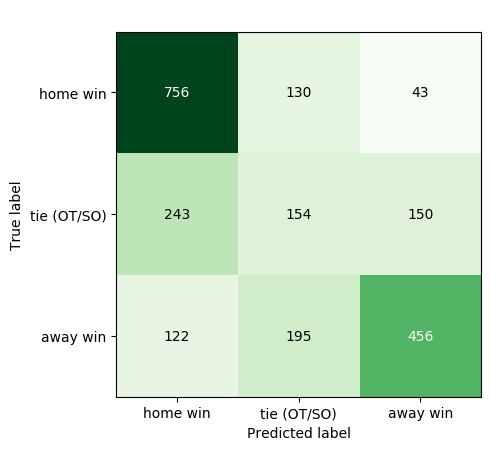

In [30]:
plt.style.use('default')

fig, ax = plt.subplots(figsize=(5,5))

cm.plot(y_test_result.argmax(axis=1), y_pred_result_cnn, classes=classes, normalize=False, title=" ", show_colorbar=False, ax=ax)

fig.tight_layout()
fig.savefig('img/confusion_matrix_cnn_convert.png')

plt.show()

In [31]:
print(classification_report(y_test_result.argmax(axis=1), y_pred_result_cnn, target_names=classes))

precision    recall  f1-score   support

    home win       0.67      0.81      0.74       929
 tie (OT/SO)       0.32      0.28      0.30       547
    away win       0.70      0.59      0.64       773

    accuracy                           0.61      2249
   macro avg       0.57      0.56      0.56      2249
weighted avg       0.60      0.61      0.60      2249

